In [3567]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

In [3568]:
drug=pd.read_csv('drug200.csv')
drug.shape

(200, 6)

In [3569]:
gender= {'M': 0,'F': 1}
bp= {'LOW':2,'NORMAL':3,'HIGH':4}
#drugcat = {'DrugY' : 1, 'drugC':2,'drugX' :3,'drugA':4, 'drugB':5}
drug.Sex= [gender[item] for item in drug.Sex]
drug.BP= [bp[item] for item in drug.BP]
drug.Cholesterol= [bp[item] for item in drug.Cholesterol]
#drug.Drug=[drugcat[item] for item in drug.Drug]

In [3570]:
drug=drug.drop(columns=['Sex'])
drug.shape

(200, 5)

In [3571]:
X = np.array(drug.drop(["Drug"],1))
X.shape

C:\Users\User\AppData\Local\Temp\ipykernel_17192\3266824466.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(drug.drop(["Drug"],1))


(200, 4)

In [3572]:
target=pd.get_dummies(drug['Drug'])
Y = np.array(target)
Y
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# Y = ohe.fit_transform(drug[['Drug']]).toarray()
# m=Y.shape[0]
# print(Y)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [3573]:
n_train = math.floor(0.8 * X.shape[0])
n_test = math.ceil((1-0.8) * X.shape[0])
X_train = X[:n_train].T
Y_train = Y[:n_train].T
X_test = X[n_train:].T
Y_test = Y[n_train:].T
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

Total Number of rows in train: 4
Total Number of rows in test: 4
shape of X_train : (4, 160)
shape of Y_train : (5, 160)
shape of X_test : (4, 40)
shape of Y_test : (5, 40)


In [3574]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [3575]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [3576]:
def initialize_parameters(n_inp, n_hid, n_out):
    w1 = np.random.randn(n_hid, n_inp)*0.01
    b1 = np.zeros((n_hid, 1))
    
    w2 = np.random.randn(n_out, n_hid)*0.01
    b2 = np.zeros((n_out, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [3577]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    
    return forward_cache

In [3578]:
def cost_function(a2, y):   
    
    m=Y.shape[0]
    cost = -(1/m)*np.sum(y*np.log(a2))

    return cost

In [3579]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [3580]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [3581]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    print(n_y)
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [3582]:
iterations = 8000
n_hid = 160
learning_rate = 0.05
Parameters, Cost_list = model(X_train, Y_train, n_h = n_hid, learning_rate = learning_rate, iterations = iterations)

5
Cost after 0 iterations is : 1.2953029632499986
Cost after 800 iterations is : 0.6406675798165332
Cost after 1600 iterations is : 0.5476240860210027
Cost after 2400 iterations is : 0.47845819615518037
Cost after 3200 iterations is : 0.41404660459455034
Cost after 4000 iterations is : 0.3587774446782656
Cost after 4800 iterations is : 0.313741749637066
Cost after 5600 iterations is : 0.2769800665600888
Cost after 6400 iterations is : 0.24654071428309926
Cost after 7200 iterations is : 0.22107568622952778


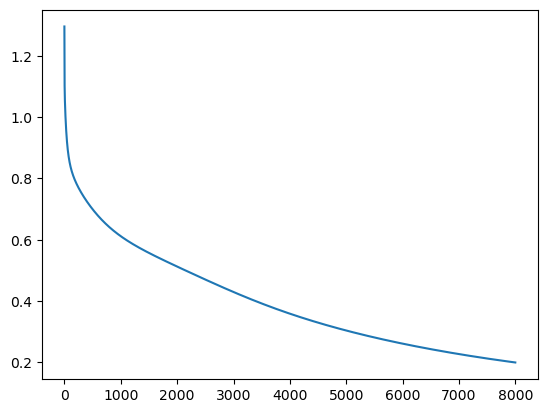

In [3583]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [3584]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']  
    
    a_out = np.argmax(a_out, 0)  
    
    labels = np.argmax(labels, 0)

    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [3585]:
print("Accuracy : ", (accuracy(X_test, Y_test, Parameters)), "%")

Accuracy :  95.0 %
